# REWARD PROGRAM ASSIGNMENT
The Rewards Program team is preparing for a major evaluation of how effectively the rewards are driving user engagement and satisfaction. They need insights to help optimise reward offerings, identify key user segments, and understand the overall impact of the reward types on user behaviour. Accurate data analysis is crucial for making data-driven decisions on reward offerings and tailoring them to different user segments.

## Task 1: Data Cleaning
### Context:
As part of our reward efforts, it’s crucial to maintain accurate and clean data. Recently, we discovered challenges in our data, which impacted our ability to allocate points to graduates and learners.

### Assignment:
I are provided with a sample dataset in the “Mentorship_Sessions” sheet that includes data related to mentorship sessions. This dataset has several duplicates and inconsistencies. My task is to:

- Identify and address any missing, incorrect, or inconsistent data within the columns. Ensure that all data is cleaned and standardised for accurate analysis and reporting.
- Identify and remove any duplicate records.
- Explain my approach to data cleaning, including the tools you used.
- Provide a summary of the cleaned data, highlighting the number of duplicates removed and any other anomalies found.

Deliverables:
- A clean version of the dataset in Excel.
- A brief report (300-500 words) detailing my  process, tools used, and findings.

________________________________________

## Task 2: Legacy Point Allocation

### Context:
Every week, I will be required to analyse, calculate, and manually award learners and graduates with points based on a set of point criteria.

### Assignment:
Using my cleaned sample dataset for “Mentorship_Sessions”, allocate points according to the criteria listed below. 

Mentors earn points as follows:
- 250 points for signing up to become a mentor (one-time allocation).
- 1000 points for conducting mentorship with 2 different mentees.
- The mentor receives 500 points per mentorship relationship, with the points being allocated as follows:
     - 250 points per session.
     - Must hold two sessions with the same mentee to earn the maximum of 500  points.
     - Each session must be a minimum of 30 minutes in length.
     - At least one session must include the completion of job information.
     - The session must be with the same mentee.

### Deliverables:
- Compile the main rules that needed to be applied for point allocation.
- Create the points allocation calculation to award the mentor points. Provide an explanation of the calculations that you applied to award the mentor points.
- A brief report (300-500 words) detailing the point allocation results and providing reasons for the results.
- Use the provided data and award the points to mentors.
- Provide a step-by-step outline of the process you would follow to complete the allocation, ensuring the points are awarded correctly on the system. This should include your approach to testing and verifying the accuracy of the allocations.

________________________________________

## Task 3: Deriving Reward Dashboard and Insights

### Context:
The Rewards Program team is focused on enhancing user engagement and maximising the effectiveness of their reward offerings. To achieve this, they require a detailed analysis of user behaviour and reward redemption patterns based on the most recent data.

### Assignment:
Using the cleaned data from the previous tasks analyse and create a reward dashboard and provide insights that could be used to optimise the Rewards Program. Your analysis should help identify key user segments (e.g., new users, top performers, low engagement) and suggest how these insights could inform future reward offerings and engagement strategies.

### Deliverables:
A visual data insights report that includes at least three actionable recommendations based on your analysis (500-700 words).



## TASK 1: DATA CLEANING

In [136]:
#importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
#Loading the dataset
file_path = r'C:\Users\Georginah\Data Analytics Projects\Reward-program\Dataset\Reward_Program_Assignment.xlsx'  # Use a raw string for the file path
data = pd.read_excel(file_path, sheet_name='Mentorship_Sessions')  # Specify the sheet name separately

# Display the first few rows of the dataset
data.head(5)


,Unnamed: 0,Mentor_ID,Mentor_Name,Mentee_Name,Session_Number,Session_Duration_Min,Job_Info_Completed,Session_Date,Points_Awarded
0,2001.0,1003.0,Sarah Clark,Bob Brown,1.0,40.0,Yes,2023-01-01,NaN
1,2002.0,1003.0,Emily Davis,Carol White,2.0,30.0,Yes,2023-01-08,NaN
2,2003.0,1005.0,James Wilson,Jane Smith,2.0,40.0,Yes,2023-01-15,NaN
3,4.0,1005.0,David Thompson,NaN,2.0,50.0,Yes,2023-01-22,NaN
4,2001.0,1004.0,Emily Davis,Bob Brown,1.0,30.0,No,2023-01-29,NaN


##### Identifing and addressing any missing, incorrect, or inconsistent data within the columns. Ensure that all data is cleaned and standardised for accurate analysis and reporting.

In [138]:
#Checking for missing values
data.isna().sum()

Unnamed: 0                1
Mentor_ID                 1
Mentor_Name               0
Mentee_Name               2
Session_Number            1
Session_Duration_Min      2
Job_Info_Completed        1
Session_Date              1
Points_Awarded          109
dtype: int64

- There are missing values in all columns apart from yhe mentor name.
- I will drop my null values as the number of rows is smaller compared to the entire dataset and the remaining data is sufficient and will provide a reliable basis for my analysis.
- The Points_Awarded column is not necessary for my immediate analysis so ill drop it for now.
- The unnamed column is not necessary for my analysis, so I will drop it

In [139]:
data.duplicated().sum()

np.int64(0)

There are no duplicates in my data

In [140]:
#checking the shape of my data
num_rows, num_columns = data.shape 
print(data.shape)

(109, 9)


In [141]:
# Display the column names
print(data.columns)


Index(['Unnamed: 0', 'Mentor_ID', 'Mentor_Name', 'Mentee_Name',
       'Session_Number', 'Session_Duration_Min', 'Job_Info_Completed',
       'Session_Date', 'Points_Awarded'],
      dtype='object')


In [142]:
#Data cleaning
#dropping the Points_Awarded column
data.drop(columns=['Unnamed: 0'], inplace=True)

In [143]:
#dropping the Points_Awarded column
data.drop(columns=['Points_Awarded'], inplace=True)
data.head(5)

,Mentor_ID,Mentor_Name,Mentee_Name,Session_Number,Session_Duration_Min,Job_Info_Completed,Session_Date
0,1003.0,Sarah Clark,Bob Brown,1.0,40.0,Yes,2023-01-01
1,1003.0,Emily Davis,Carol White,2.0,30.0,Yes,2023-01-08
2,1005.0,James Wilson,Jane Smith,2.0,40.0,Yes,2023-01-15
3,1005.0,David Thompson,NaN,2.0,50.0,Yes,2023-01-22
4,1004.0,Emily Davis,Bob Brown,1.0,30.0,No,2023-01-29


In [144]:
Clean_data = data.dropna()
#viewing the cleaned data
Clean_data.head()

,Mentor_ID,Mentor_Name,Mentee_Name,Session_Number,Session_Duration_Min,Job_Info_Completed,Session_Date
0,1003.0,Sarah Clark,Bob Brown,1.0,40.0,Yes,2023-01-01
1,1003.0,Emily Davis,Carol White,2.0,30.0,Yes,2023-01-08
2,1005.0,James Wilson,Jane Smith,2.0,40.0,Yes,2023-01-15
4,1004.0,Emily Davis,Bob Brown,1.0,30.0,No,2023-01-29
5,1002.0,David Thompson,Jane Smith,2.0,50.0,No,2023-02-05


In [145]:
#checking the sg=hape of my clean data
# num_rows, num_columns = Clean_data.shape 
print(Clean_data.shape)

(106, 7)


In [146]:
#confirming if there are any nulls
Clean_data.isna().sum()

Mentor_ID               0
Mentor_Name             0
Mentee_Name             0
Session_Number          0
Session_Duration_Min    0
Job_Info_Completed      0
Session_Date            0
dtype: int64

My data is clean and ready for analysis

In [147]:
# Saving my clean data in the Dataset folder
Clean_data.to_excel(r'C:\Users\Georginah\Data Analytics Projects\Reward-program\Dataset\Cleaned_data.xlsx', index=False)



## My approach to Data Cleaning
In this project, I focused on cleaning a dataset related to mentorship sessions to ensure accuracy and reliability for subsequent analysis. The dataset was initially provided in Excel format, and I used Python with the Pandas library for the cleaning process. Below are the key steps I followed:

#### Loading the Data:

- I imported the necessary libraries and loaded the dataset using the Pandas read_excel() function, specifying the file path of the dataset.

#### Exploring the Data:

- I examined the initial structure of the dataset using the head() method to understand its contents and identify potential issues, such as formats.

####  Checking the shape of the data
- I used data.shape to identify the number of rows and columns of my data

#### Identifying Missing Values:

-I used the isna().sum() method to identify missing values across all columns in the dataset. This allowed me to assess which columns required attention.

#### Handling Missing Values:

- After reviewing the missing values, I made a strategic decision to drop the Points_Awarded column because it did not have any values, and was not necessary for this part of my analysis. This was done to avoid skewing future analyses and facilitate the calculation of points awarded later.
- I also deleted the other missing values as the number of rows was smaller compared to the entire dataset and the remaining data was sufficient and would provide a reliable basis for my analysis.


#### Removing Duplicates:

- I checked for duplicates using the duplicated() method. Upon review, I found no duplicate records in the dataset, which confirmed that the data was unique.
Date Format Validation:


Summary of Cleaned Data:

- Finally, I generated a summary of the cleaned dataset, which now contains columns such as Mentor_ID, Mentor_Name, Mentee_Name, Session_Number, Session_Duration_Min, Unnamed, Job_Info_Completed and Session_Date.
- Summary of the Cleaned Data
  - Total rows and columns(106,8)
   -  Zero nulls and Zero duplicates
- The dataset is now prepared for further analysis, ensuring that the remaining data is accurate and ready for the next steps in the project. 

## Task 2: Legacy Point Allocation

### Compilation of  the Main Rules for Point Allocation
- One-time Signup Points:
Mentors receive 250 points for signing up as a mentor.
- Mentorship Points for Different Mentees:
Mentors earn 1000 points for conducting mentorship with two different mentees.


- Points per Mentorship Relationship:
500 points can be earned per mentorship relationship, awarded as follows:
#### 250 points per session (for a maximum of two sessions with the same mentee).
#### Points can only be earned if:
  - Each session is at least 30 minutes long.
  - At least one session includes the completion of job information.
  - Sessions must be held with the same mentee.

In [148]:
#Loading the cleaned data
cleaned_data = pd.read_excel(r'C:\Users\Georginah\Data Analytics Projects\Reward-program\Dataset\Cleaned_data.xlsx')


In [149]:
#Adding legacy points column
cleaned_data['Legacy_Points'] = 0


In [150]:
#Viewing my data
cleaned_data.head(5)

,Mentor_ID,Mentor_Name,Mentee_Name,Session_Number,Session_Duration_Min,Job_Info_Completed,Session_Date,Legacy_Points
0,1003,Sarah Clark,Bob Brown,1,40,Yes,2023-01-01,0
1,1003,Emily Davis,Carol White,2,30,Yes,2023-01-08,0
2,1005,James Wilson,Jane Smith,2,40,Yes,2023-01-15,0
3,1004,Emily Davis,Bob Brown,1,30,No,2023-01-29,0
4,1002,David Thompson,Jane Smith,2,50,No,2023-02-05,0


### Testing and verifying accuracy of allocation

In [151]:

# Creating a mock data for testing
mock_data = pd.DataFrame({
    'Mentor_ID': [1, 1, 1, 2, 2, 3, 3],
    'Mentee_Name': ['Mentee_A', 'Mentee_A', 'Mentee_B', 'Mentee_C', 'Mentee_D', 'Mentee_E', 'Mentee_E'],
    'Session_Duration_Min': [40, 50, 60, 30, 40, 20, 30],
    'Job_Info_Completed': ['Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes']
})

# Add a column for points
mock_data['Legacy_Points'] = 0

#Viewing my data
mock_data.head()

,Mentor_ID,Mentee_Name,Session_Duration_Min,Job_Info_Completed,Legacy_Points
0,1,Mentee_A,40,Yes,0
1,1,Mentee_A,50,No,0
2,1,Mentee_B,60,Yes,0
3,2,Mentee_C,30,No,0
4,2,Mentee_D,40,Yes,0


In [152]:
# Iterate over each unique mentor ID
for mentor_id in mock_data['Mentor_ID'].unique():
    mentor_sessions = mock_data[mock_data['Mentor_ID'] == mentor_id]
    Legacy_points = 0  # Initialize points for each mentor
    
    # One-time signup points
    Legacy_points += 250 
    
    # Check if the mentor has 2 or more unique mentees
    mentee_count = mentor_sessions['Mentee_Name'].nunique()
    if mentee_count >= 2:
        Legacy_points += 1000
    
    # Calculate points per mentorship relationship
    for mentee in mentor_sessions['Mentee_Name'].unique():
        mentee_sessions = mentor_sessions[mentor_sessions['Mentee_Name'] == mentee]
        
        if len(mentee_sessions) >= 2:
            # Check session duration and job info completion
            valid_sessions = mentee_sessions[
                (mentee_sessions['Session_Duration_Min'] >= 30) & 
                (mentee_sessions['Job_Info_Completed'] == 'Yes')
            ]
            if len(valid_sessions) > 0:
                Legacy_points += 500  # maximum points for that mentee

    # Assign the calculated points to all rows for the current mentor
    mock_data.loc[mock_data['Mentor_ID'] == mentor_id, 'Legacy_Points'] = Legacy_points

# Display the results
print(mock_data[['Mentor_ID', 'Legacy_Points']])

   Mentor_ID  Legacy_Points
0          1           1750
1          1           1750
2          1           1750
3          2           1250
4          2           1250
5          3            750
6          3            750


### Checking for accuracy of mock data
- Mentor 1
Has two mentees (Mentee_A and Mentee_B), so gets 1000 points for mentoring two mentees.
Has two sessions with Mentee_A, both over 30 minutes, but only one completes job info, so gets 500 points.
Total = 250 (signup) + 1000 (2 mentees) + 500 (sessions) = 1750 points.


- Mentor 2:
Has two mentees (Mentee_C and Mentee_D), so gets 1000 points.
Mentee_D sessions meet the job info and duration criteria, so gets 500 points.
Total = 250 (signup) + 1000 (2 mentees) + 500 (sessions) = 1750 points.

## Allocating legacy points for my data

In [153]:
#iterating over each unique mentor ID in the cleaned dataset
for mentor_id in cleaned_data['Mentor_ID'].unique():
    #filtering the dataset for sessions related to the current mentor
    mentor_sessions = cleaned_data[cleaned_data['Mentor_ID'] == mentor_id]
    #initializing the points for the mentor
    Legacy_points = 0
    
    #Awarding one-time signup points for becoming a mentor
    Legacy_points += 250 
    
    #counting the number of unique mentees for the current mentor
    mentee_count = mentor_sessions['Mentee_Name'].nunique()
    #Awarding extra points if the mentor has worked with atleast two mentees
    if mentee_count >= 2:
        Legacy_points += 1000
    
    # Calculate points per mentorship relationship
    for mentee in mentor_sessions['Mentee_Name'].unique():
        #filtering sessions for the current mentee
        mentee_sessions = mentor_sessions[mentor_sessions['Mentee_Name'] == mentee]
        #Checking if there are at least two sessions with the same mentee
        if len(mentee_sessions) >= 2:
            # Check session duration and job info completion
            valid_sessions = mentee_sessions[
                (mentee_sessions['Session_Duration_Min'] >= 30) & 
                (mentee_sessions['Job_Info_Completed'] == 'Yes')
            ]
            #If there are any valid sessions, award the maximum points for that mentee
            if len(valid_sessions) > 0:
                Legacy_points += 500  # maximum points for that mentee
  # Assign total points to the mentor
    cleaned_data.loc[cleaned_data['Mentor_ID'] == mentor_id, 'Legacy_Points'] = Legacy_points

               

In [154]:
cleaned_data.head(10)

,Mentor_ID,Mentor_Name,Mentee_Name,Session_Number,Session_Duration_Min,Job_Info_Completed,Session_Date,Legacy_Points
0,1003,Sarah Clark,Bob Brown,1,40,Yes,2023-01-01,3750
1,1003,Emily Davis,Carol White,2,30,Yes,2023-01-08,3750
2,1005,James Wilson,Jane Smith,2,40,Yes,2023-01-15,2750
3,1004,Emily Davis,Bob Brown,1,30,No,2023-01-29,3750
4,1002,David Thompson,Jane Smith,2,50,No,2023-02-05,1750
5,1002,Michael Lee,Jane Smith,2,50,No,2023-02-05,1750
6,1004,Sarah Clark,John Doe,2,40,Yes,2023-02-12,3750
7,1004,Sarah Clark,Carol White,1,30,No,2023-02-26,3750
8,1002,James Wilson,Carol White,1,40,No,2023-03-05,1750
9,1003,Sarah Clark,Bob Brown,1,30,Maybe,2023-03-12,3750


## Task 3: Deriving Reward Dashboard and Insights

- I will answer the following questions using visualizations
1. Which mentors are top performers based on the legacy points accumulated?
2. What is the average session duration across different mentors?
3. How does job info completion impact point allocation?
4. Who are the top 5 mentors by session frequency?
5. What percentage of mentors meet the minimum session duration criteria (30 minutes)?
6. Which mentees are being mentored the most frequently?

1. Which mentors are top performers based on the legacy points accumulated?

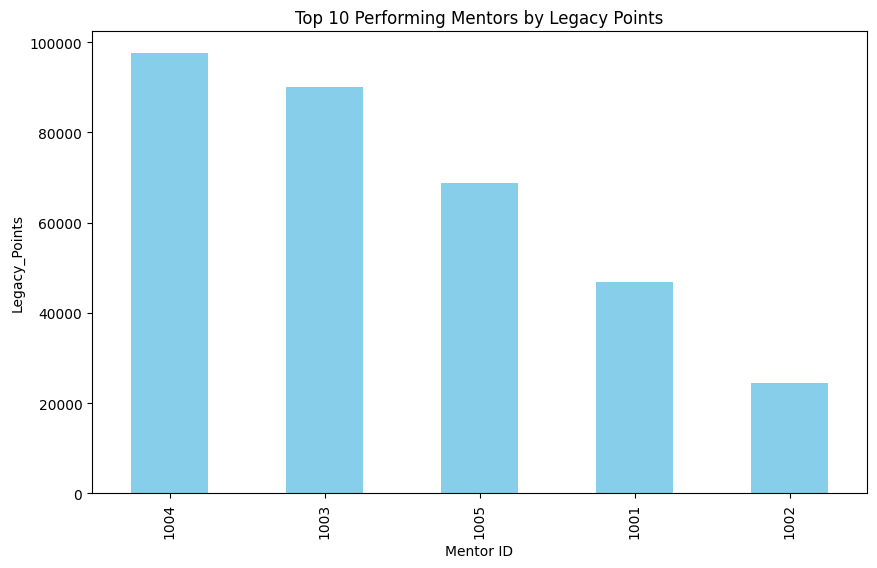

In [155]:
# Top performing mentors based on points
top_mentors = cleaned_data.groupby('Mentor_ID')['Legacy_Points'].sum().sort_values(ascending=False).head(10)

# Bar plot of top 10 performing mentors
plt.figure(figsize=(10,6))
top_mentors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Performing Mentors by Legacy Points')
plt.xlabel('Mentor ID')
plt.ylabel('Legacy_Points')
plt.show()


2. What is the average session duration across different mentors?

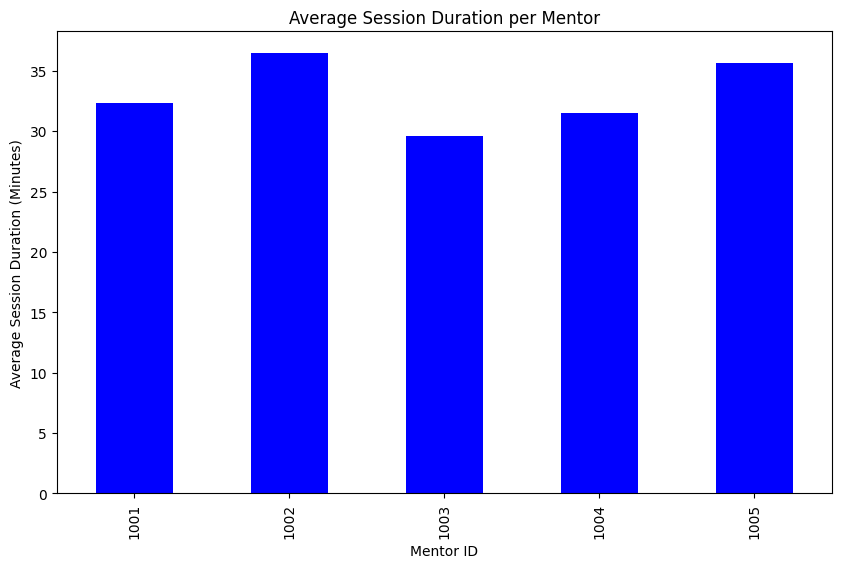

In [156]:
# Calculate average session duration per mentor
avg_session_duration = cleaned_data.groupby('Mentor_ID')['Session_Duration_Min'].mean()

# Bar plot of average session duration
plt.figure(figsize=(10,6))
avg_session_duration.plot(kind='bar', color='blue')
plt.title('Average Session Duration per Mentor')
plt.xlabel('Mentor ID')
plt.ylabel('Average Session Duration (Minutes)')
plt.show()


3. How does job info completion impact point allocation?

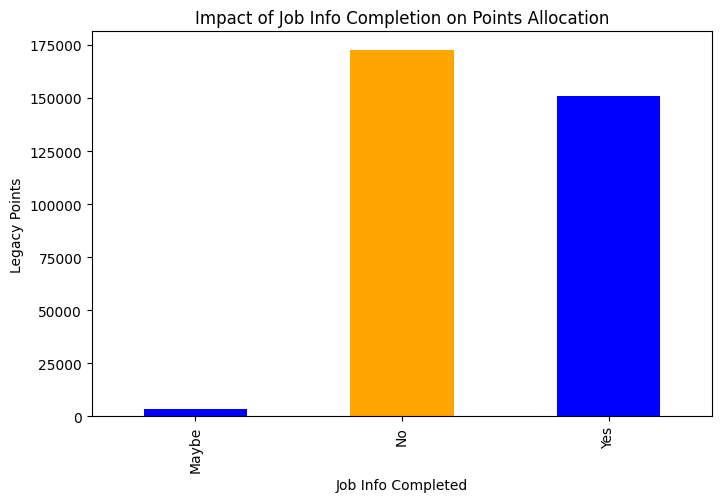

In [157]:
# Group by job info completion and calculate total points
job_info_impact = cleaned_data.groupby('Job_Info_Completed')['Legacy_Points'].sum()

# Plot the grouped bar chart
plt.figure(figsize=(8,5))
job_info_impact.plot(kind='bar', color=['blue', 'orange'])
plt.title('Impact of Job Info Completion on Points Allocation')
plt.xlabel('Job Info Completed')
plt.ylabel('Legacy Points')
plt.show()


4. Who are the top 5 mentors by session frequency?

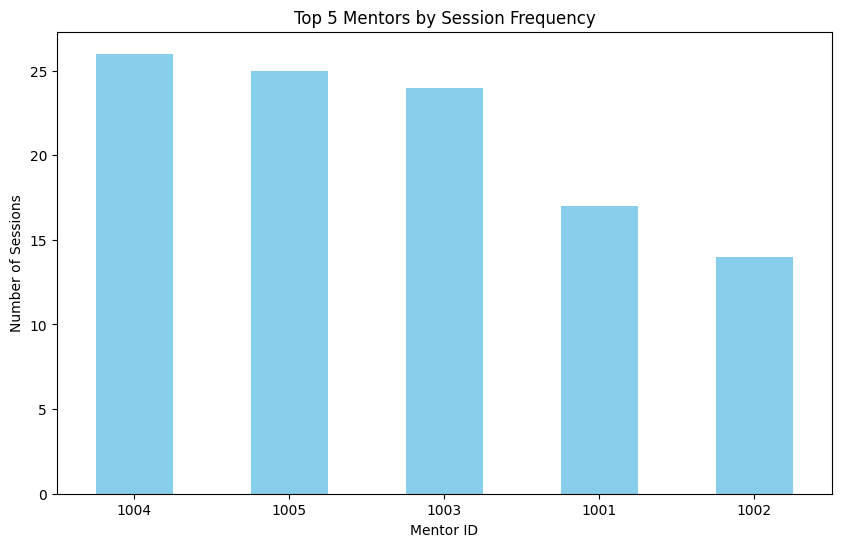

In [158]:
# Count the number of sessions per mentor
session_count = cleaned_data.groupby('Mentor_ID')['Session_Duration_Min'].count()

# Get the top 5 mentors by session frequency
top_5_sessions = session_count.nlargest(5)

# Plotting the top 5 mentors
plt.figure(figsize=(10, 6))
top_5_sessions.plot(kind='bar', color='skyblue')
plt.title('Top 5 Mentors by Session Frequency')
plt.xlabel('Mentor ID')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=0)
plt.show()


5. What percentage of mentors meet the minimum session duration criteria (30 minutes)?

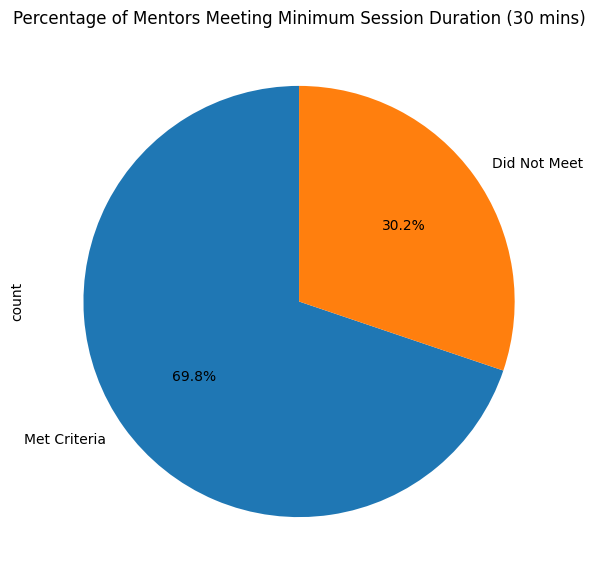

In [159]:
# Check the number of mentors meeting session duration criteria
session_duration_criteria = (cleaned_data['Session_Duration_Min'] >= 30).value_counts()

# Pie chart for mentors meeting criteria
plt.figure(figsize=(7,7))
session_duration_criteria.plot(kind='pie', labels=['Met Criteria', 'Did Not Meet'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Mentors Meeting Minimum Session Duration (30 mins)')
plt.show()


10.Top 5 most frequently mentored mentees?

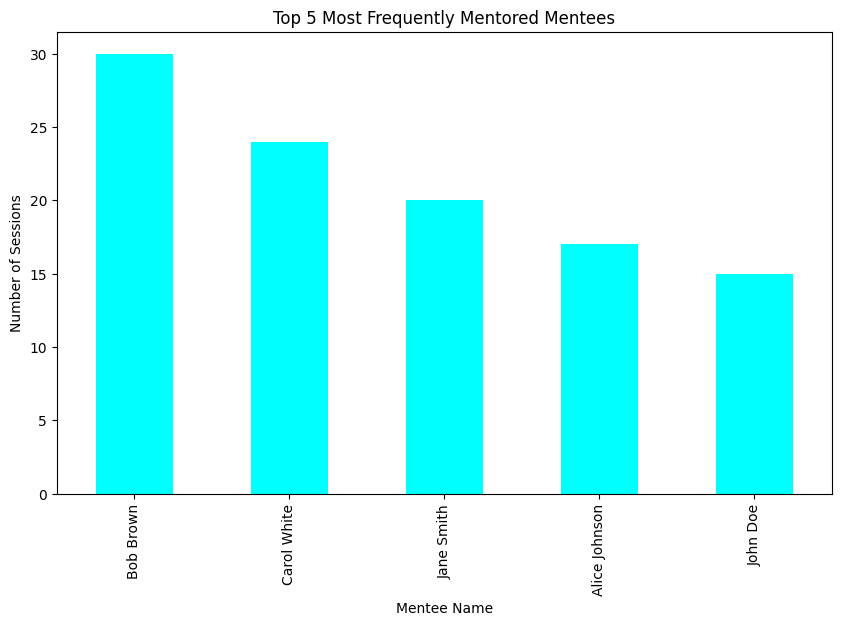

In [160]:
#10
# Count number of sessions per mentee
mentee_session_count = cleaned_data['Mentee_Name'].value_counts()

# Bar chart of most frequently mentored mentees
plt.figure(figsize=(10,6))
mentee_session_count.head(10).plot(kind='bar', color='cyan')
plt.title('Top 5 Most Frequently Mentored Mentees')
plt.xlabel('Mentee Name')
plt.ylabel('Number of Sessions')
plt.show()


### Observations
- Bob Brown is the mentee with most sessions, followed by Carol White
- Jogn doe has the least number of sessions
- 69.8% of mentors met the 30 minutes criteria for a session while 30.2% did not
- Mentors of mentor IDs 1004 and 1005 had the most number of sessions
- Mentor of mentor ID 1002 had the least numver of sessions
- Job info completion does not affect legacy point allocation, as the values with 'No' as the job info completion have more lagacy points


In [161]:
# Saving my cleaned data with legacy points in the Dataset folder
cleaned_data.to_excel(r'C:\Users\Georginah\Data Analytics Projects\Reward-program\Dataset\Cleaned_legacy_data.xlsx', index=False)